# Clustering - Kmeans
1. Simple walk through example
2. Analysing songs
3. Cluster Validation
4. Kmeans Limitations

# Lab Part 1. KMeans

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
%matplotlib inline


In [ ]:
# ------------------------------------------
# EXERCISE: Compute the centoid of the following data
#           [2, 5], [4, 4], [3, 3]
# ------------------------------------------

d = np.array([[2, 5], [4, 4], [3, 3]])
x, y = d.mean(axis=0)
x, y

In [ ]:
# Import iris data
iris = datasets.load_iris()
d = iris.data

np.random.seed(0)

In [ ]:
# Run KMeans using 3 clusters
est = KMeans(n_clusters=3, init='random')
est.fit(d)
y_kmeans = est.predict(d)

colors = np.array(['#FF0054','#FBD039','#23C2BC'])
plt.figure()
plt.scatter(d[:, 2], d[:, 0], c=colors[y_kmeans], s=50)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[0])

In [ ]:
# ------------------------------------------
# Find the centers and plot them 
#     on the same graph.
# ------------------------------------------

centers = est.cluster_centers_
plt.figure()
plt.scatter(d[:, 2], d[:, 0], c=colors[y_kmeans], s=50)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[0])
plt.scatter(centers[:, 2], centers[:, 0], c='k', linewidths=3,
            marker='+', s=300)

In [ ]:
# Option #1: Scatter Plot Grid
plt.figure(figsize=(8, 8))
plt.suptitle('Scatter Plot Grid',  fontsize=14)
# Upper Left
plt.subplot(221)
plt.scatter(d[:,2], d[:,0], c = colors[y_kmeans])
plt.ylabel(iris.feature_names[0])

# Upper Right
plt.subplot(222)
plt.scatter(d[:,3], d[:,0], c = colors[y_kmeans])

# Lower Left
plt.subplot(223)
plt.scatter(d[:,2], d[:,1], c = colors[y_kmeans])
plt.ylabel(iris.feature_names[1])
plt.xlabel(iris.feature_names[2])

# Lower Right
plt.subplot(224)
plt.scatter(d[:,3], d[:,1], c = colors[y_kmeans])
plt.xlabel(iris.feature_names[3])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
plt.suptitle('3d plot', fontsize=15)
ax = Axes3D(plt.figure(figsize=(10, 9)), rect=[.01, 0, 0.95, 1], elev=30, azim=134)
ax.scatter(d[:,0], d[:,1], d[:,2], c = colors[y_kmeans], s=120)
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Petal Length')

In [ ]:
from pandas.tools.plotting import parallel_coordinates

features = [name[:-5].title().replace(' ', '') for name in iris.feature_names]
iris_df = pd.DataFrame(iris.data, columns = features)
iris_df['Name'] = iris.target_names[iris.target]
parallel_coordinates(frame=iris_df, class_column='Name', 
                     color=('#FF0054', '#FBD039', '#23C2BC'))

### Determining the number of clusters

In [ ]:
'''
DETERMINING THE NUMBER OF CLUSTERS
How do you choose k? There isn't a bright line, but we can evaluate 
performance metrics such as the silhouette coefficient and within sum of 
squared errors across values of k.

scikit-learn Clustering metrics documentation:
http://scikit-learn.org/stable/modules/classes.html#clustering-metrics
'''

# Create a bunch of different models
k_rng = range(1,15)
est = [KMeans(n_clusters = k).fit(d) for k in k_rng]

#================================
# Option 1: Silhouette Coefficient
# Generally want SC to be closer to 1, while also minimizing k

from sklearn import metrics
silhouette_scores = [metrics.silhouette_score(d, e.labels_, metric='euclidean') for e in est[1:]]

silhouette_scores

# Plot the results
plt.figure(figsize=(7, 8))
plt.subplot(211)
plt.title('Using the elbow method to inform k choice')
plt.plot(k_rng[1:], silhouette_scores, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.ylabel('Silhouette Coefficient')
plt.plot(3,silhouette_scores[1], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


In [ ]:
# Option 2: Within Sum of Squares (a.k.a., inertia)
# Generally want to minimize WSS, while also minimizing k

within_sum_squares = [e.inertia_ for e in est]

within_sum_squares


# Plot the results
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Within Sum of Squares')
plt.plot(3,within_sum_squares[2], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


# Lab Part 2. Analysing songs

In [2]:
df = pd.read_csv('songs.csv')

In [3]:
df.shape

(235, 314)

In [14]:
df['party rhymes'].dtype

dtype('bool')

In [13]:
df

,name,party rhymes,folk influences,indian influences,use of ambient synths,sexist lyrics,catchy hooks,Puerto Rican roots,a knack for catchy hooks,subtle use of white noise,...,smooth synth textures,use of techno synths,ska influences,prominent drums,cash obsessed lyrics,surreal lyrics,rhythmic clapping,jazz influences,arpeggiated synths,varying tempo and time signatures
0,/andybody/1st-bass-is-deepest-single/1st-bass-...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,/angels-airwaves/everythings-magic/everythings...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,/angels-airwaves/i-empire/call-to-arms,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,/angels-airwaves/i-empire/secret-crowds,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,/angels-airwaves/warped-tour-2008-compilation/...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,/antiserum-mayhem/bangladesh-trippy-single/ban...,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,/antiserum-mayhem/bangladesh-trippy-single/trippy,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,/arctic-monkeys/favourite-worst-nightmare/fluo...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,/barenaked-ladies/stunt/1-week,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,/beck/mellow-gold/loser,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# explore
df.head()

In [3]:
# perform clustering with 4 clusters
song_cluster = KMeans(n_clusters=4, init='random')
song_cluster.fit(df.drop('name', axis=1))
y_kmeans = song_cluster.predict(df.drop('name', axis=1))

### Use Silhouette metric to measure the cluster quality

Silhoute is a measure of cluster cohesiveness. See the sklearn code for a plot:
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [4]:

# get info on one cluster
for cluster_in_question in range(0,4):
    # get center of cluster
    "centroid", song_cluster.cluster_centers_[cluster_in_question]
    # grab songs in dataframe that belong to this cluster
    songs = df[np.where(y_kmeans == cluster_in_question, True, False)]['name']
    # look at top five qualities in cluster
    print (sorted(zip(df.columns[1:], song_cluster.cluster_centers_[cluster_in_question]), key=lambda x:x[1], reverse=True)[1:6])

[('beats made for dancing', 0.85714285714285698), ('effected synths', 0.74285714285714277), ('synth swoops', 0.62857142857142811), ('use of modal harmonies', 0.60000000000000009), ('a highly synthetic sonority', 0.59999999999999987)]
[('electronica influences', 0.88235294117647034), ('consistent rhyme patterns', 0.82352941176470607), ('syncopated beats', 0.76470588235294101), ('hardcore rap influence', 0.64705882352941158), ('the use of chordal patterning', 0.58823529411764719)]
[('use of modal harmonies', 0.88888888888888895), ('prevalent use of groove', 0.88888888888888895), ('the use of chordal patterning', 0.83333333333333337), ('house roots', 0.7222222222222221), ('a variety of synth sounds', 0.66666666666666652)]
[('extensive vamping', 0.29090909090909084), ('electric rock instrumentation', 0.26666666666666683), ('repetitive melodic phrasing', 0.23636363636363622), ('punk influences', 0.22424242424242435), ('acoustic rhythm guitars', 0.19393939393939377)]


In [5]:
from sklearn import metrics
metrics.silhouette_score(df.drop('name',axis=1), song_cluster.labels_, metric='euclidean')   


0.20438011048848304

In [6]:
# perform k means with up to 15 clusters
# similar to grid search, just using a list
# comprehension
k_rng = range(1,15)
est = [KMeans(n_clusters = k).fit(df.drop('name',axis=1)) for k in k_rng]

# What do these clusters look like?

Now plot the clusters!

In [ ]:
# Write code to plot the clusters
...

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.189434386846


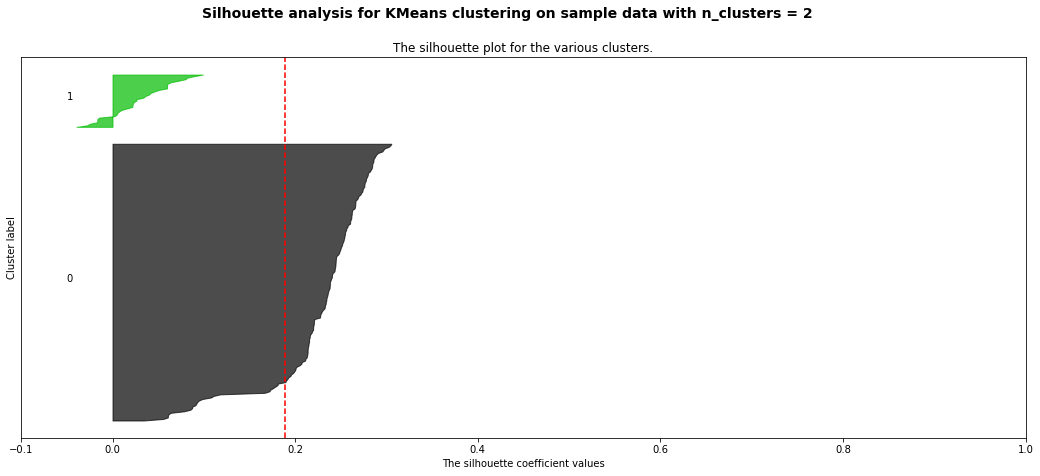

For n_clusters = 3 The average silhouette_score is : 0.204380110488


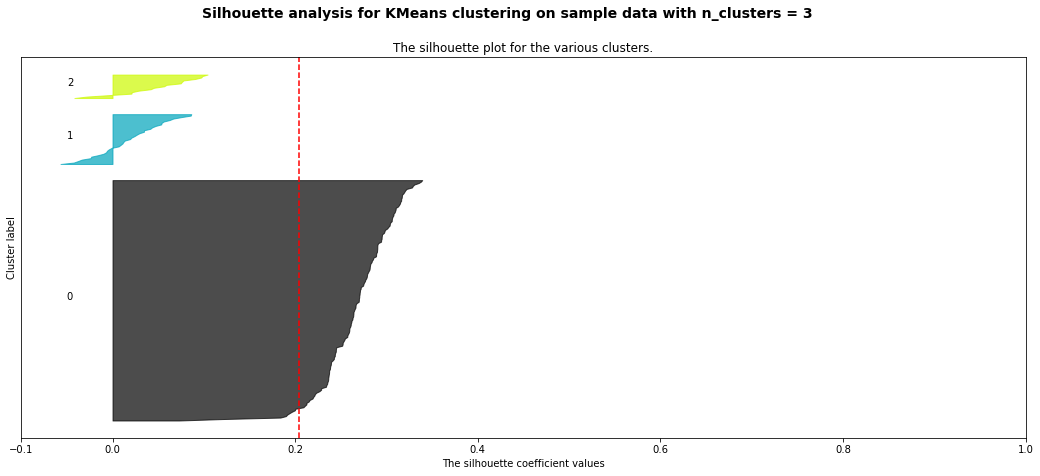

For n_clusters = 4 The average silhouette_score is : 0.0596794605613


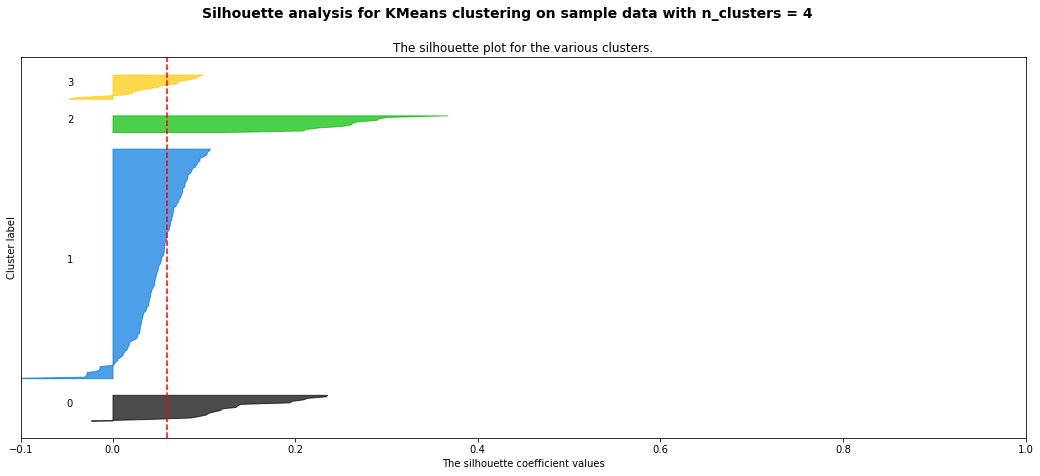

For n_clusters = 5 The average silhouette_score is : 0.0573667213375


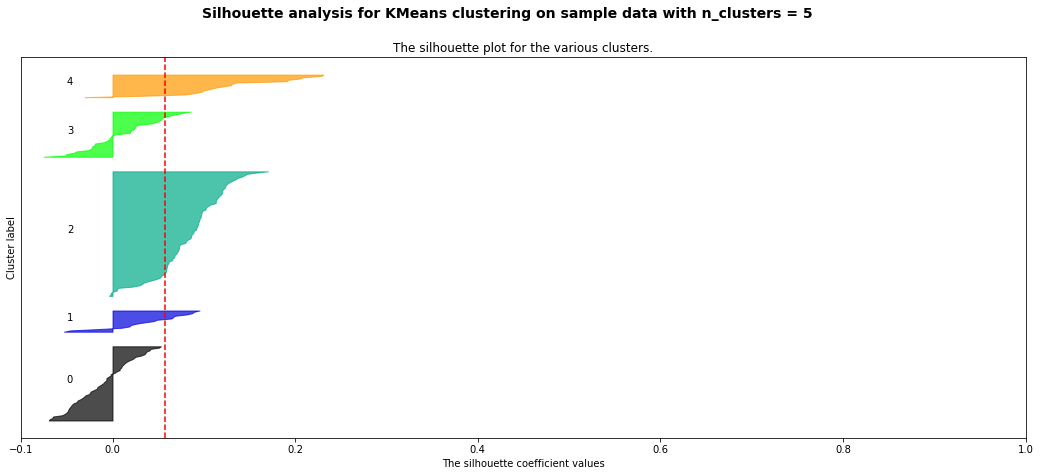

For n_clusters = 6 The average silhouette_score is : 0.0825150565515


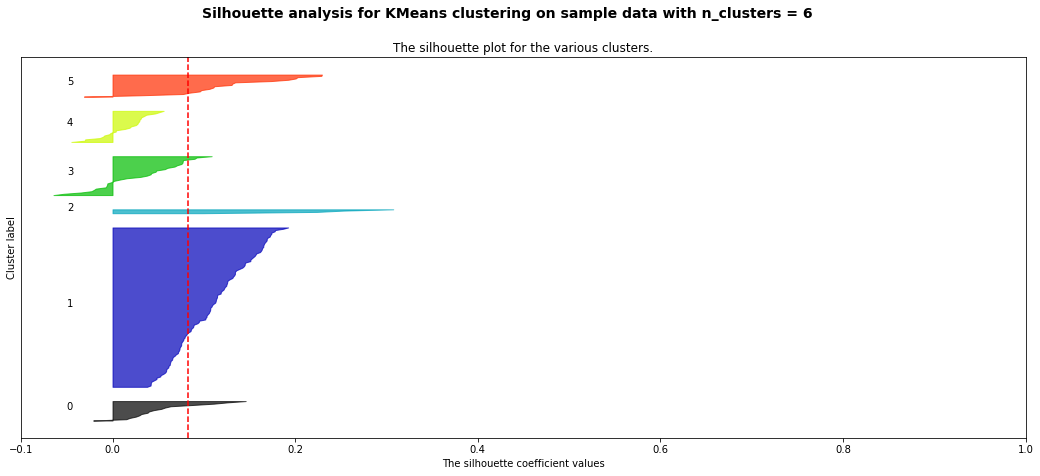

For n_clusters = 7 The average silhouette_score is : 0.0565536335644


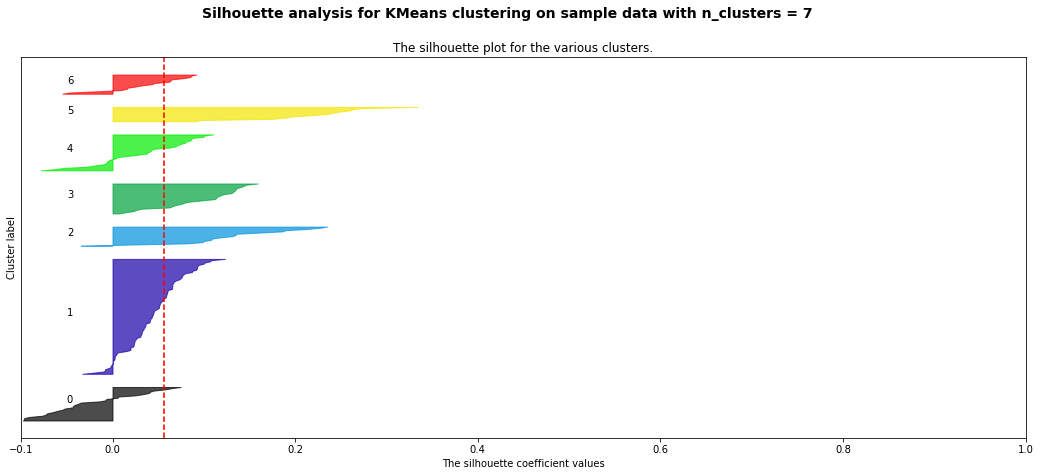

For n_clusters = 8 The average silhouette_score is : 0.0537885350579


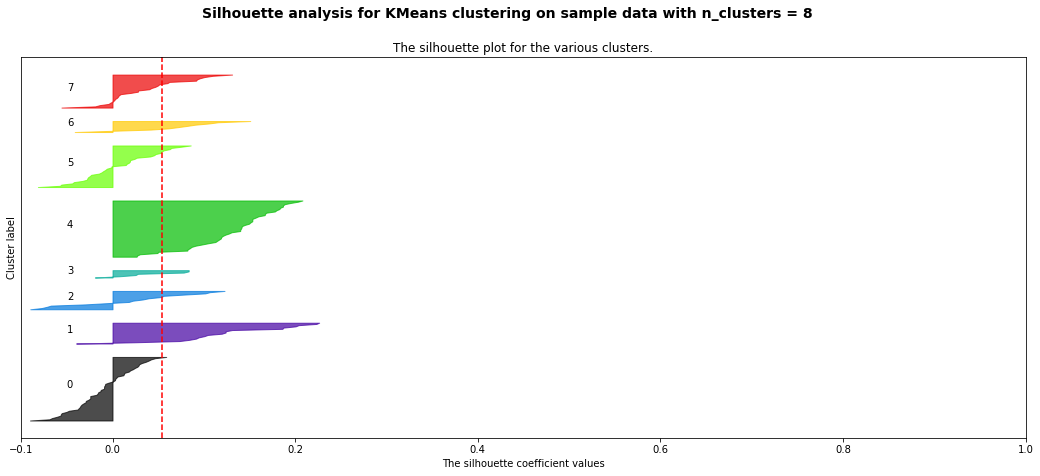

For n_clusters = 9 The average silhouette_score is : 0.0603380227999


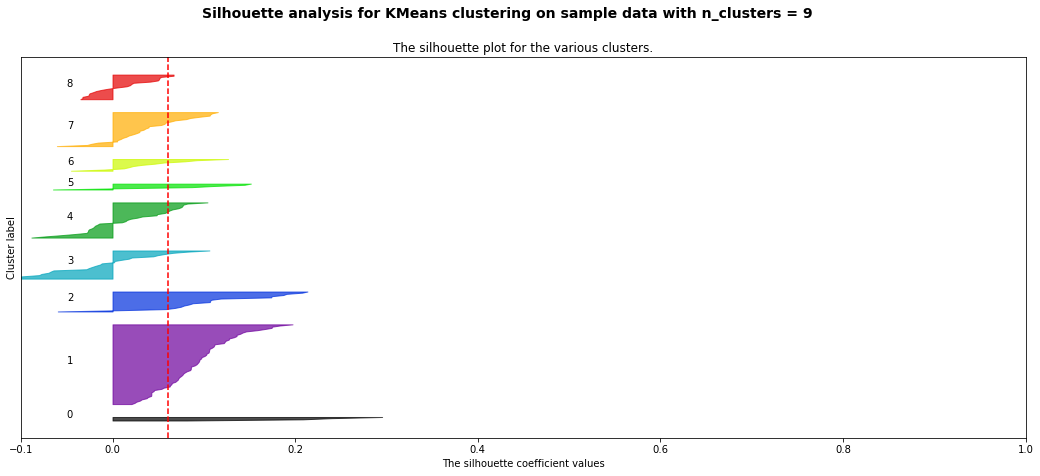

For n_clusters = 10 The average silhouette_score is : 0.0446883763154


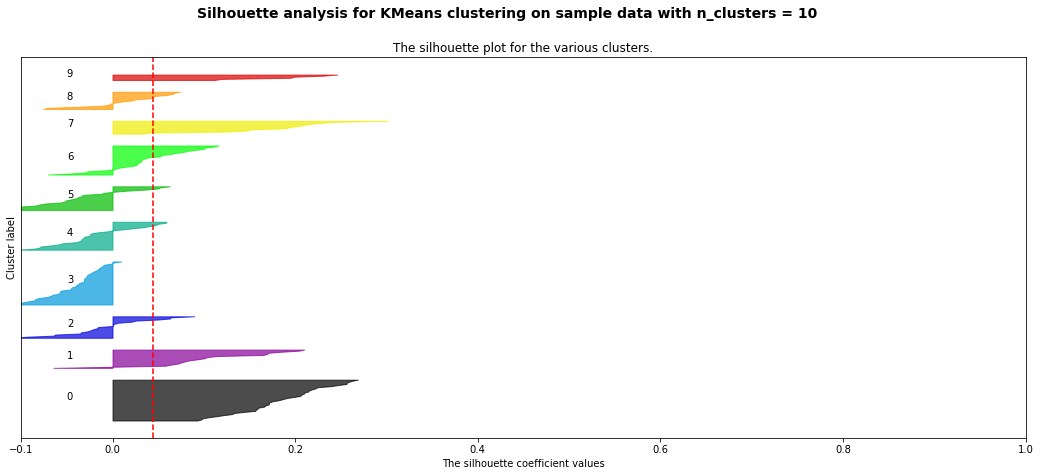

In [7]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

range_n_clusters = k_rng[1:10]

for n_clusters in range_n_clusters:
    # create plot object, 
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    clusterer = est[n_clusters]
    cluster_labels = clusterer.fit_predict(df.drop('name',axis=1))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(df.drop('name',axis=1), cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(df.drop('name',axis=1), cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
          "with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

    plt.show()

In [ ]:
#clusterer = KMeans(n_clusters=n_clusters, random_state=10)
clusterer = est[1]
cluster_labels = clusterer.fit_predict(df.drop('name',axis=1))

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(df.drop('name',axis=1), cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df.drop('name',axis=1), cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.show()

In [ ]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

range_n_clusters = k_rng[0:12]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    #fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    clusterer = est[n_clusters]
    cluster_labels = clusterer.fit_predict(df.drop('name',axis=1))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df.drop('name',axis=1), cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df.drop('name',axis=1), cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("The silhouette plot for the various clusters.")
    #ax1.set_xlabel("The silhouette coefficient values")
    #ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.show()

## 3. Cluster Validation

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn import metrics

np.random.seed(0)

'''
K = 2
'''

# Generate and Plot Dummy Data for k = 2
centres = [[2, 0.75], [0, 0]]
X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1))
labels_true = np.concatenate((labels0_true,labels1_true+1))
colors = np.array(['#FF0054','#FBD039'])
plt.figure(figsize=(12, 8))
plt.suptitle('Cluster Validation Evaluation', fontsize=15)
plt.subplot(331)
plt.text(-0.5, 1.5, 'k=2', fontsize=14)
for k, col in zip(range(2), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Data with truth labels')
plt.ylabel('y')


In [ ]:
# Calculate Silhouette Scores for different values of K, highlighting k = 2
k_rng = range(1,15)
est = [KMeans(n_clusters = k).fit(X) for k in k_rng]
silhouette_score = [metrics.silhouette_score(X, e.labels_, metric='euclidean') for e in est[1:]]
plt.plot(k_rng[1:], silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.title('Silhouette Coefficient')
plt.plot(2,silhouette_score[0], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


Question: Do you think k=2 is a good value for the silhouette coefficient?

In [ ]:
# Calculate the within sum of squared errors for different values of K, highlighting k = 2
within_sum_squares = [e.inertia_ for e in est]
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.title('Within Sum of Squared Errors')
plt.plot(2,within_sum_squares[1], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


Question: Do you think this is a good value for within sum of squares? If not, which value of k would be better?

### Now perform K-means clustering for K=3, and plot it. 

In [ ]:
'''
K = 3
'''

# Generate and Plot Dummy Data for k = 3
centres = [[2, 0.75], [1, -0.75], [0, 0]]
X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.2,0.2]])
X2, labels2_true = make_blobs(n_samples=300, centers=centres[2], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))
colors = np.array(['#FF0054','#FBD039','#23C2BC'])
plt.text(-1, 1.5, 'k=3', fontsize=14)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.ylabel('y')

In [ ]:

# Calculate Silhouette Scores for different values of K, highlighting k = 3
est = [KMeans(n_clusters = k).fit(X) for k in k_rng]
silhouette_score = [metrics.silhouette_score(X, e.labels_, metric='euclidean') for e in est[1:]]
plt.plot(k_rng[1:], silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.plot(3,silhouette_score[1], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

         

In [ ]:
# Calculate the within sum of squared errors for different values of K, highlighting k = 3
within_sum_squares = [e.inertia_ for e in est]
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.plot(3,within_sum_squares[2], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


In [ ]:
# Generate and Plot Dummy Data for k = 5
centres = [[2, 0.75], [1, -0.75], [0, 0], [0.5, 1.5], [3, -0.5]]
X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.2,0.2]])
X2, labels2_true = make_blobs(n_samples=300, centers=centres[2], cluster_std=[[0.2,0.2]])
X3, labels3_true = make_blobs(n_samples=300, centers=centres[3], cluster_std=[[0.2,0.2]])
X4, labels4_true = make_blobs(n_samples=300, centers=centres[4], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1,X2,X3,X4))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2,
                              labels3_true+3,labels4_true+4))
colors = np.array(['#FF0054','#FBD039','#23C2BC', '#650A34', '#808080'])
plt.text(-1, 2, 'k=5', fontsize=14)
for k, col in zip(range(5), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
# Calculate Silhouette Scores for different values of K, highlighting k = 5
est = [KMeans(n_clusters = k).fit(X) for k in k_rng]
silhouette_score = [metrics.silhouette_score(X, e.labels_, metric='euclidean') for e in est[1:]]
plt.plot(k_rng[1:], silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.xlabel('k')
plt.plot(5,silhouette_score[3], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

In [ ]:
# Calculate the within sum of squared errors for different values of K, highlighting k = 5
within_sum_squares = [e.inertia_ for e in est]
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.xlabel('k')
plt.plot(5,within_sum_squares[4], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

## 4. Kmeans Limitations

In [ ]:
'''
NOTES ON LIMITATIONS OF K-MEANS CLUSTERING

Adapted from Bart Baddely's 2014 PyData Presentation:
http://nbviewer.ipython.org/github/BartBaddeley/PyDataTalk-2014/blob/master/PyDataTalk.ipynb

Agenda: 
1) K-means might not work when dimensions have different scales
2) K-means might not work for non-spherical shapes
3) K-means might not work for clusters of different sizes
'''

from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets.samples_generator import make_blobs, make_moons
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

'''
1) DIMENSIONS WITH DIFFERENT SCALES
'''

# Generate data with differing variances
np.random.seed(0)

centres = [[1, 0.75], [1, -0.75], [0, 0]]

X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.6,0.1]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.6,0.1]])
X2, labels2_true = make_blobs(n_samples=300, centers=centres[2], cluster_std=[[0.6,0.1]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))

colors = np.array(['#FF0054','#FBD039','#23C2BC'])

plt.figure(figsize=(12, 6))
plt.suptitle('Dimensions with Different Scales', fontsize=15)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Original data')

# Compute clustering with 3 Clusters
k_means_3 = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means_3.fit(X)
k_means_3_labels = k_means_3.labels_
k_means_3_cluster_centres = k_means_3.cluster_centers_

# Plot result
distance = euclidean_distances(k_means_3_cluster_centres,
                               centres,
                               squared=True)
order = distance.argmin(axis=0)
for k, col in zip(range(3), colors):              
    my_members = k_means_3_labels == order[k]
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)           
    cluster_center = k_means_3_cluster_centres[order[k]]
    plt.scatter(cluster_center[0], cluster_center[1], marker = 'o', c=col, s=200, alpha=0.8)            
plt.axis('equal')
plt.title('KMeans 3')

'''
#2: NON-SPHERICAL SHAPES
'''

[X, true_labels] = make_moons(n_samples=1000, noise=.05)

plt.figure(figsize=(12, 6))
plt.suptitle('Non-Spherical Shapes', fontsize=15)
for k, col in zip(range(2), colors):
    my_members = true_labels == k
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o', s=20)

plt.axis('equal')
plt.title('Original Data') 
    
# Compute clustering with 2 Clusters
k_means_2 = KMeans(init='k-means++', n_clusters=2, n_init=10)
k_means_2.fit(X)
k_means_2_labels = k_means_2.labels_
k_means_2_cluster_centers = k_means_2.cluster_centers_

for k, col in zip(range(2), colors):           
    my_members = k_means_2_labels == k
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)     
    cluster_center = k_means_2_cluster_centers[k]
    plt.scatter(cluster_center[0], cluster_center[1], marker = 'o', c=col, s=200, alpha=0.8) 
plt.axis('equal')
plt.title('KMeans 2')

'''
#3: CLUSTERS OF DIFFERENT SIZES
'''

np.random.seed(0)

centres = [[-1, 0], [1, 0], [3, 0]]

X0, labels0_true = make_blobs(n_samples=100, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=400, centers=centres[1], cluster_std=[[0.6,0.6]])
X2, labels2_true = make_blobs(n_samples=100, centers=centres[2], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))

plt.figure(figsize=(12, 6))
plt.suptitle('Clusters of Different Sizes', fontsize=15)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Original data')

# Compute clustering with 3 Clusters
k_means_3 = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means_3.fit(X)
k_means_3_labels = k_means_3.labels_
k_means_3_cluster_centres = k_means_3.cluster_centers_

# Plot result
distance = euclidean_distances(k_means_3_cluster_centres,
                               centres,
                               squared=True)
order = distance.argmin(axis=0)
for k, col in zip(range(3), colors):              
    my_members = k_means_3_labels == order[k]
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)           
    cluster_center = k_means_3_cluster_centres[order[k]]
    plt.scatter(cluster_center[0], cluster_center[1], marker = 'o', c=col, s=200, alpha=0.8)            
plt.axis('equal')
plt.title('KMeans 3')

# 5. Apply DBSCAN

For the data sets generated in point 4, apply DBSCAN and plot the results to see how well it does on each set, compared to K-Means

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
